# Social Minimal Interaction

There exist social processes that emerge in collective online situations –when two persons are engaged in real-time interactions– that can not be captured by a traditional offline perspective, understanding the problem in terms of an isolated individual that acts as observer exploiting its internal cognitive mechanisms to understand people.

Some authors have pointed out the need of designing metrics capturing the ‘ability for interaction’ that subjects have as a constituent element of sensorimotor and social cognition. In these cases, dynamical processes with emergent collective properties are generated, overflowing the individual abilities of each interlocutor.

During the last years, a classical experiment has been taken as inspiration for building a minimal framework known as the ‘perceptual crossing paradigm’, which has allowed a series of studies on social interactions which focus on the dynamical process of interactions as a constituent element of the emergence of the whole social system.

Previous analysis have been constrained to short-term dynamic responses of the player. In turn, we propose a complex systems approach based on the analysis of long-range correlations and fractal dynamics as a more suitable framework for the analysis of complex social interactions that are deployed along many scales of activity.

# 1. The perceptual crossing paradigm

From an experimental point of view, a minimal paradigm has been consolidated along the recent years. Perceptual crossing paradigm constitutes a simple framework for studying social online interactions, and for understanding the mechanisms that give support to social capabilities. The experiment involves two participants sitting in different rooms and interacting by moving a sensor along a shared virtual line using a computer mouse. In this experimental framework, several experiments can be designed providing us with a way to study online dyadic interaction and to analyze the perception of someone else’s agency in different situations implemented in minimal virtual worlds. Those experiments highlight that emergent coordination processes result in successful detection of agency although, on an individual level, participants can not discriminate it. Furthermore, all these results illustrate the importance of online dynamical interaction in the analysis of human social cognition.

# 2. Experimental framework

The device of the participants consisted of a computer-mouse that moved left and right searching someone to interact. The environment consisted of a virtual one-dimensional space of 800 pixels long with both ends connected, forming a torus to avoid the singularities induced by the edges. The participant shifted a cursor in this space moving her computer-mouse. 

In this blindfold experiment, human participants were placed in computers to interact in pairs, within a shared perceptual space, where some opponents were other human participants and some opponents were computerized agents (bots) but participants are unaware of the nature of their opponents. Concretely, participants could play against another human, an 'oscillatory agent', or a 'shadow agent'. The oscillatory agent moved according a sinusoidal function while the shadow agent replicated the movements of the player with a certain delay in time and in space.

When opponents (human-human or human-bot) cross their cursors, they receive an auditive stimulation. No image of the cursors or their positions were displayed on the computerscreen, so the auditive stimulations were the only environmental perceptions of the virtual space.

![](PercCross-Traces.png)


## 2.1. Exercise

The script below reads the data from the experiment just related. We are going to analize the velocity of the movement for each type of match (human-human, human-oscillatory, and human-shadow):

- Plot the graph of the velocity of the participant.
- Obtain the main statistics of the velocity: mean, variance.
- Are there any differences related to the type of opponent?

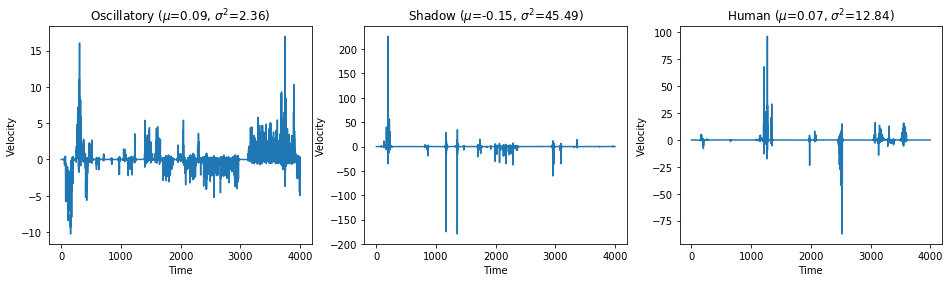

In [2]:
%matplotlib inline
import numpy as np
import scipy.io
import scipy.signal as signal
from matplotlib import pyplot as plt
from pyeeg import dfa as dfa

def readFilePerceptualCrossing(filename):
    data = scipy.io.loadmat(filename)
    size = len(data['dataSeries'])
    series  = [data['dataSeries'][i][0] for i in range(size)]
    series  = np.array(series)[:,:,0]
    series  = signal.decimate(series, 10, zero_phase=True)
    series  = np.diff(series)
    oppType = [data['dataOpponentType'][i][0] for i in range(size)]
    oppType = np.array(oppType)[:,0]
    return [series, oppType]

# Read data
[vel_player  , oppTypes] = readFilePerceptualCrossing('dataPC-player.mat')
[vel_opponent, oppTypes] = readFilePerceptualCrossing('dataPC-opponent.mat')
[vel_relative, oppTypes] = readFilePerceptualCrossing('dataPC-distance.mat')
indexOscill = [i for i, x in enumerate(oppTypes) if x=="Oscillatory"]
indexShadow = [i for i, x in enumerate(oppTypes) if x=="Shadow"]
indexHuman  = [i for i, x in enumerate(oppTypes) if x=="Human"]

series = vel_player

# Plot figures
plt.figure(figsize=(16, 4), dpi=72)
indexExamples = [60, 7, 11];
for i,ex in enumerate(indexExamples):
    x = series[ex,:]
    ax = plt.subplot(1,3,(i+1))
    plt.title(oppTypes[ex]+r" ($\mu$={:0.2f}".format(np.mean(x))+r", $\sigma^2$={:0.2f}".format(np.var(x))+")")
    ax.set(xlabel="Time", ylabel="Velocity", )
    plt.plot(x);


We can display the box-plot of the velocity to check if there are differences between groups.
- Try other velocity variables looking for differences between groups, e.g. velocity of opponent, relative velocity

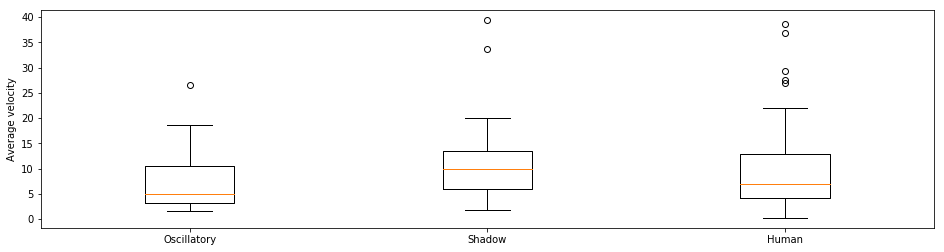

In [7]:
# Calculate the average velocity of each serie
vel_stats=np.std(vel_player,axis=1) # velocity of the player
#vel_stats=np.std(vel_opponent,axis=1) # velocity of the opponent
#vel_stats=np.std(vel_relative,axis=1) # relative velocity between player

# Plot figure
plt.figure(figsize=(16, 4), dpi=72)
dataBox = [vel_stats[indexOscill], vel_stats[indexShadow], vel_stats[indexHuman]]
plt.boxplot(dataBox);
plt.ylabel("Average velocity")
plt.xticks([1, 2, 3], ['Oscillatory', 'Shadow', 'Human']);


# 3. Fractal analysis

Despite of its apparent simplicity, the perceptual crossing paradigm comprises several embedded of dynamic interaction, resulting on auto-correlations of the signals over different time scales.

Critical systems typically display temporal and spatial scale invariance in the form of fractals and 1/f noise, reflecting the process of propagation of long-range interactions based on local effects. For the complex systems approach to cognitive science, self-organized criticallity is appealing because it allows us to imagine systems that are able to self-regulate coordinated behaviours at different scales in a distributed manner and without a central controller.

We argue that 1/f noise analysis can account not only for the integratedness the behaviour of an agencial system (e.g. the mental, psychological characteristics of human behaviour) but also can characterize the nature of social interaction process. In our experimental setup we have a broad range of kinds of social interaction: humans recognizing each others as such, humans interacting with bots with artificial behaviour, humans failing to recognize other humans, bots tricking humans... Can we characterize when genuine social interaction emerges? And if so, where does it lies?

For analyzing fractal exponents in the dynamics of social interaction we use the Detrended Fluctuation Analysis (DFA). Since the slope of the fluctuations in a logarithmic plot is not always linear for all scales, we check if there is any cutoff value in which a transition to a linear relation starts. We do this by searching for negative peaks in the second derivate of F (n). We only do this on the right half of the values of n in the plot, in order to find only the cutoffs at larger scales. Once the cutoff is found, we analyze the slope of the function in the decade inferior to the cutoff value. In the cases where there is no cutoff value (as in Figure 2.c) we analyze the interval $n \in [10^{-0.5},10^{0.5}]$.

## 3.1. Exercise

Run a DFA analysis to obtain the fractal index β.
- Plot the fluctuation versus timescales graphics for the three opponent types: shadow, oscillatory and human. Are there any statistical differences for each type of opponent?
- Load the data of the movement of the opponent and re-run the analysis. Are there statistical differences now?

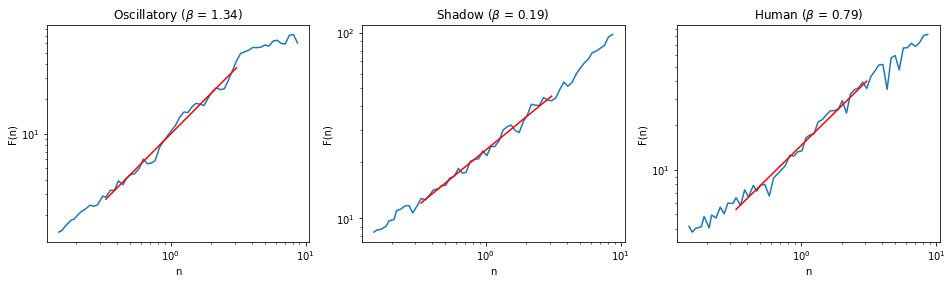

In [9]:
def plot_dfa_perceptual(x, precision, title, drawPlot):
    ix = np.arange(np.log2(len(x)/4), 4, -precision)
    n = np.round(2**ix)
    [_, n, F] = dfa(x, L=n)
    n = n/115 # Time (seconds) = samples / sample_frequency
    indexes = (n>10**-0.5)&(n<10**0.5) # Time interval for calculating the slope
    P = np.polyfit(np.log(n[indexes]),np.log(F[indexes]), 1)
    beta = 2*P[0]-1 # beta=2*alpha-1
    if drawPlot:
        plt.title(title+r" ($\beta$ = {:0.2f})".format(beta))
        plt.xlabel('n')
        plt.ylabel('F(n)')
        plt.loglog(n, F)
        plt.loglog(n[indexes], np.power(n[indexes], P[0])*np.exp(P[1]), 'r')
    return [beta, n, F]

# Plot figures
series = vel_player
plt.figure(figsize=(16, 4), dpi=72)
indexExamples = [60, 7, 11];
for i,ex in enumerate(indexExamples):
    x = series[ex,:]
    ax = plt.subplot(1,3,(i+1))
    plot_dfa_perceptual(x, 0.1, oppTypes[ex], True);


Now, we display the boxplot of the results to get an statistical overview. For the cases of the derivative of the player's position or the opponent's possition, we cannot assure an statistical difference between the distributions of β.

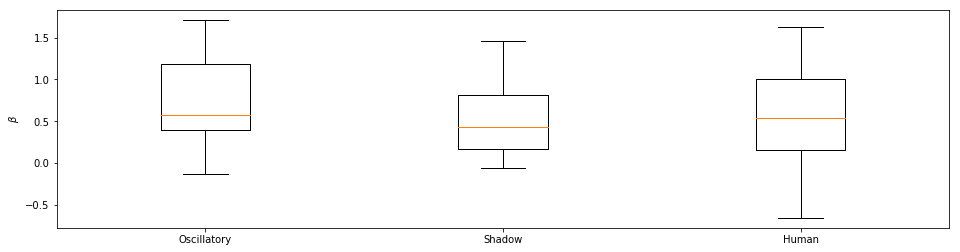

In [11]:
# Calculate the average velocity of each serie
series = vel_player

betas = np.zeros(len(series));
for i in range(len(series)):
    [beta,_,_] = plot_dfa_perceptual(series[i,:], 0.5, oppTypes[i], False)
    betas[i] = beta

# Plot figures
plt.figure(figsize=(16, 4), dpi=72)
dataBox = [betas[indexOscill], betas[indexShadow], betas[indexHuman]]
plt.boxplot(dataBox);
plt.ylabel(r'$\beta$');
plt.xticks([1, 2, 3], ['Oscillatory', 'Shadow', 'Human']);


# 4. Interaction measures

We propose that genuine social interaction should be manifested by emerging integratedness in collective variables capturing the dynamics of this interactions. Concretely, we propose the changes in the distance between the two participants as a candidate variable for test this hypothesis. On the other hand, if social engagement truly arises from interaction dynamics, individual variables as the changes in the position of the agent or the opponent should not present significative changes in their levels of integratedness and thus the exponents obtained from 1/f analysis.

In order to analyze the interaction between the subjects, we take the time series of the distance between the two players (or the player and the bot agent). We compute the first derivative of the distance to obtain the variations in the distance i.e. whether the players are approaching or distancing themselves at each moment of time. Then we use a DFA algorithm [Peng et al. (2000)] to compute the correlations in the data series of distance variations.



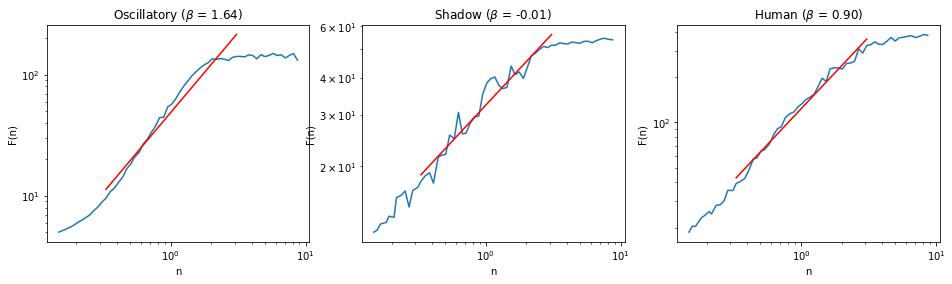

In [16]:
# Data
series = vel_relative

# Plot figures
plt.figure(figsize=(16, 4), dpi=72)
indexExamples = [60, 7, 11];
for i,ex in enumerate(indexExamples):
    ax = plt.subplot(1,3,(i+1))
    plot_dfa_perceptual(series[ex,:], 0.1, oppTypes[ex], True);

The boxplot displays statistical differences.

When the opponent is the oscillatory agent (dashed lines), we find that the values of β in the time series is around 1.5. This means that the interactions are closer to a brown noise structure, meaning that the interaction is more rigid and structured than in the other cases. This makes sense since the movement of the oscillatory agent is going constrain the interactions into its cyclic movement structure.

On the other hand, when the opponent is the shadow agent (dash-dot lines), we have the opposite situation, and the interaction dynamics tends to display values of β greater but close to 0. This means that the history of interaction is more random and uncorrelated. Finally, when the opponent is other human player (solid lines), the exponents of the interactions dynamic are around a value of β close to 1, indicating that they follow a pink noise structure between randomness and coherence. This suggest that the dynamics emerge from a situation where the movement of both players is softly assembled into a coherent coordination.

The 1/f spectrum results show that the changes in the relative position of the player to its opponent show that the interaction process is completely different when genuine social interaction is happening than when the player is interacting with object with trivial (oscillatory) or complex (shadow) patterns of movement. It is interesting that pink noise only emerges for a collective variable (the derivative of the distance) only in the case of human-human interaction, suggesting the hypothesis that social interaction is based on the emergence of the soft assembling of the activity of the pair of players. In the cases when this assembling is more rigid or too weak the emergent system disappears.

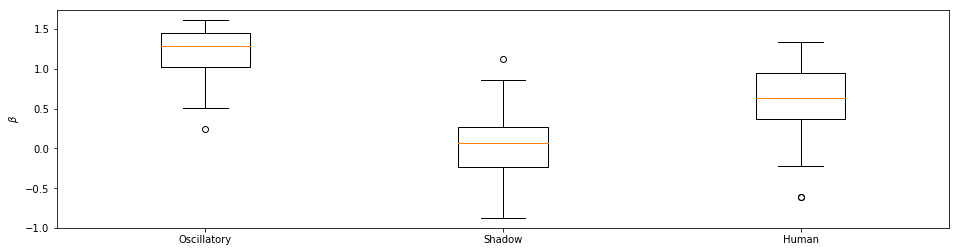

In [17]:
# Data
series = vel_relative

# Plot figures
plt.figure(figsize=(16, 4), dpi=72)
indexExamples = [0];
for i in range(len(series)):
    [beta,_,_] = plot_dfa_perceptual(series[i,:], 0.5, oppTypes[i], False)
    betas[i] = beta
dataBox = [betas[indexOscill], betas[indexShadow], betas[indexHuman]]
plt.boxplot(dataBox);
plt.ylabel(r'$\beta$');
plt.xticks([1, 2, 3], ['Oscillatory', 'Shadow', 'Human']);

# References
- Auvray, Malika, Charles Lenay, and John Stewart. ["Perceptual interactions in a minimalist virtual environment."](https://pdfs.semanticscholar.org/80d1/9c83409c675e9793de72144bd0232172dff5.pdf) New ideas in psychology 27.1 (2009): 32-47.
- Bedia, Manuel G., et al. ["Quantifying long-range correlations and 1/f patterns in a minimal experiment of social interaction."](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4228835/) Frontiers in psychology 5 (2014).

